In [13]:
# Doppler Effect

"""
Main visualization for this display:
    - Wave point source
    - Changing perceived wavelength and frequency relative to a stationary/moving observer
    - Numerical changing equation display for the effect

Things that would move:
    - The wave source - closer/further from person (User controlled slider)
    - Wave
    - Wave equation according to the slider
    - Color: According to red and blue shift
"""

'\nMain visualization for this display:\n    - Wave point source\n    - Changing perceived wavelength and frequency relative to a stationary/moving observer\n    - Numerical changing equation display for the effect\n\nThings that would move:\n    - The wave source - closer/further from person (User controlled slider)\n    - Wave\n    - Wave equation according to the slider\n    - Color: According to red and blue shift\n'

In [14]:
# Magic command for interactive plots
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import ipywidgets as widgets
from IPython.display import display, clear_output

In [15]:
class DopplerVisualizer:
    def __init__(self):
        # Initialize figure and plot elements
        self.fig, self.ax = plt.subplots(figsize=(10, 8))
        self.ax.set_aspect('equal')
        
        # Plot settings
        self.ax.set_xlim(-15, 15)
        self.ax.set_ylim(-15, 15)
        self.ax.grid(True, linestyle='--', alpha=0.6)
        self.ax.set_title('Doppler Effect Visualization')
        self.ax.set_xlabel('Position (m)')
        self.ax.set_ylabel('Position (m)')
        
        # Initialize positions
        self.observer_pos = 0
        self.source_pos = 5.0
        
        # Create plot elements
        self.observer_dot, = self.ax.plot([self.observer_pos], [0], 'go', 
                                        markersize=10, label='Observer')
        self.source_dot, = self.ax.plot([self.source_pos], [0], 'ro', 
                                      markersize=10, label='Source')
        self.ax.legend()
        
        # Store wave circles
        self.wave_circles = []
        self.text_annotation = None
        
        # Create widgets
        self.source_slider = widgets.FloatSlider(
            value=self.source_pos,
            min=-10.0,
            max=10.0,
            step=0.1,
            description='Source Position:',
            continuous_update=True
        )
        
        self.pause_button = widgets.ToggleButton(
            value=False,
            description='Pause',
            button_style='warning'
        )
        
        # Initialize animation
        self.ani = None
        
    def draw_waves(self, source_x, frame):
        """Draw expanding circular waves"""
        # Clear old waves
        for circle in self.wave_circles:
            circle.remove()
        self.wave_circles.clear()
        
        # Calculate relative velocity and wavelength modification
        relative_velocity = (source_x - self.observer_pos)
        wavelength_factor = 1 + relative_velocity / 10
        
        # Draw new waves
        num_waves = 8
        max_radius = 15
        
        for i in range(num_waves):
            radius = (frame/2 - i * 2) % max_radius
            if radius > 0:
                adjusted_radius = radius * abs(wavelength_factor)
                wave_color = 'blue' if relative_velocity < 0 else 'red'
                alpha = 0.6
                
                circle = plt.Circle((source_x, 0), adjusted_radius,
                                  color=wave_color, fill=False,
                                  alpha=alpha, lw=1.5)
                self.ax.add_patch(circle)
                self.wave_circles.append(circle)
    
    def update(self, frame):
        """Animation update function"""
        source_x = self.source_slider.value
        
        # Update source position
        self.source_dot.set_data([source_x], [0])
        
        # Update waves
        self.draw_waves(source_x, frame)
        
        # Update source color
        self.source_dot.set_color('blue' if source_x < self.observer_pos else 'red')
        
        # Update text
        if self.text_annotation:
            self.text_annotation.remove()
        
        if source_x < self.observer_pos:
            text = 'Blueshift: Waves compress\nFrequency increases'
            color = 'blue'
        else:
            text = 'Redshift: Waves expand\nFrequency decreases'
            color = 'red'
        
        self.text_annotation = self.ax.text(0.02, 0.98, text,
                                          transform=self.ax.transAxes,
                                          va='top', color=color)
        
        return self.observer_dot, self.source_dot
    
    def start_animation(self, _=None):
        """Start or restart the animation"""
        if self.ani is not None:
            self.ani.event_source.stop()
        
        if not self.pause_button.value:
            self.ani = FuncAnimation(
                self.fig,
                self.update,
                frames=np.arange(0, 1000),
                interval=50,
                blit=False
            )
            plt.show()
    
    def display(self):
        """Display the visualization"""
        # Connect widget events
        self.source_slider.observe(self.start_animation, names='value')
        self.pause_button.observe(self.start_animation, names='value')
        
        # Display widgets and plot
        display(widgets.VBox([self.source_slider, self.pause_button]))
        self.start_animation()

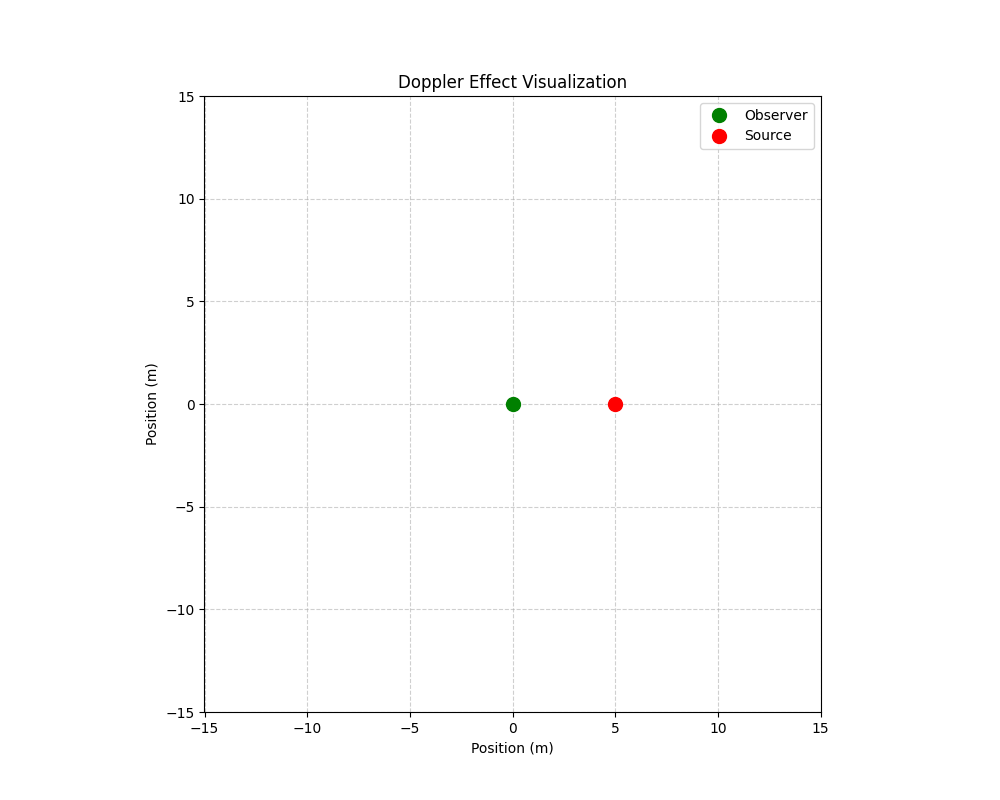

In [16]:
# Create and display the visualization
visualizer = DopplerVisualizer()
visualizer.display()